# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

### Sinh viên không được phép sử dụng internet
### Sinh viên sau khi làm bài xong xuất ra file PDF đồng thời nộp lên Fit-lab và push lên git-hub
### Sinh viên làm bắt đầu làm bài từ 15h40 - 18h00

In [ ]:
# Họ và Tên: Trần Lương Hòa
# MSSV: 2174802010453

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [70]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X,y = load_dataset()
print(X.shape ,y.shape )

(100, 4) (100,)


Kết quả: (100, 4) (100,)

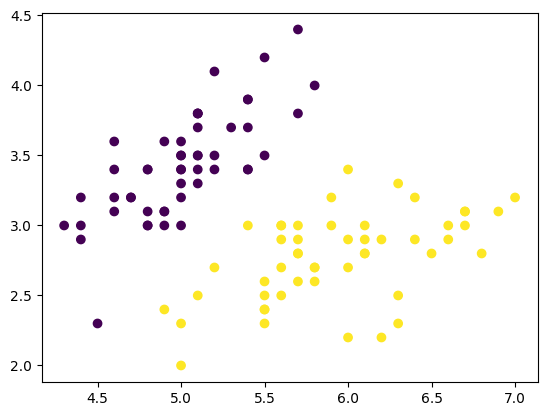

In [71]:
#Trực quan hóa dữ liệu data
#Điền code ở đây
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('')
plt.ylabel('')
plt.show()

Kết quả

![image.png](attachment:image.png)

In [72]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1)               # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [73]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)            #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)

    def __getitem__(self, idx):
        return  self.X[idx], self.y[idx]            #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [74]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

In [75]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size = int(0.7 * len(dataset))                        #70%
test_size = len(dataset) - train_size                       #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [76]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [77]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
model = LogisticRegressTorch(n_features)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [78]:
# Huấn luyện mô hình
n_epochs = 100
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/100, Train Loss: 1.1487, Test Loss: 1.0041, Test Accuracy: 0.5000
Epoch 2/100, Train Loss: 1.0277, Test Loss: 0.8807, Test Accuracy: 0.5000
Epoch 3/100, Train Loss: 0.8973, Test Loss: 0.7610, Test Accuracy: 0.5000
Epoch 4/100, Train Loss: 0.7727, Test Loss: 0.6716, Test Accuracy: 0.5000
Epoch 5/100, Train Loss: 0.6815, Test Loss: 0.6291, Test Accuracy: 0.5000
Epoch 6/100, Train Loss: 0.6344, Test Loss: 0.5762, Test Accuracy: 0.5000
Epoch 7/100, Train Loss: 0.5796, Test Loss: 0.5501, Test Accuracy: 0.5000
Epoch 8/100, Train Loss: 0.5523, Test Loss: 0.5358, Test Accuracy: 0.5000
Epoch 9/100, Train Loss: 0.5372, Test Loss: 0.5247, Test Accuracy: 0.5000
Epoch 10/100, Train Loss: 0.5238, Test Loss: 0.5033, Test Accuracy: 0.8333
Epoch 11/100, Train Loss: 0.5016, Test Loss: 0.4984, Test Accuracy: 0.9333
Epoch 12/100, Train Loss: 0.4958, Test Loss: 0.4873, Test Accuracy: 1.0000
Epoch 13/100, Train Loss: 0.4832, Test Loss: 0.4815, Test Accuracy: 1.0000
Epoch 14/100, Train Loss: 0.4767, 

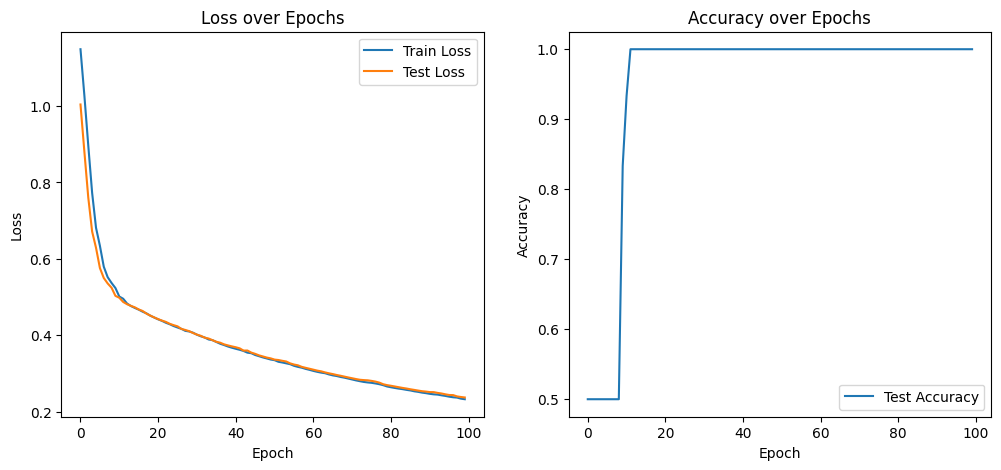

In [79]:
# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Vẽ biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

#Kết quả:

![image.png](attachment:image.png)